# Linear Regression

We'll use gradient-descent to fit a line to a set of data, using least-squares to calculate error.

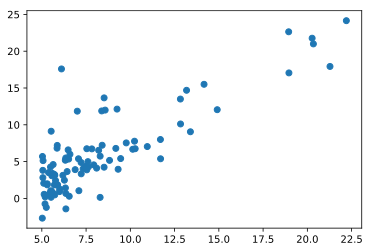

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

# Load example data
x, y = np.loadtxt('ex1data1.txt', delimiter=',', unpack=True)

plt.scatter(x, y)

In [2]:
def sq_error(x, y_expected, m, c):
    """
    Δy = (y_expected - (mx + c))^2
    """
    
    return np.mean((y_expected - (m * x + c))**2)

## Gradient Descent

Given a learning rate $\epsilon$, we can compute new values for $m$ and $c$ from the following equations:

$$ nE = \sum_{i=0}^n (x_i\cdot m + c - y_i)^2 $$

$$ n\frac{\partial E}{\partial m} = \sum_{i=0}^n 2(x_i \cdot m + c - y_i)x_i$$
$$ n\frac{\partial E}{\partial c} = \sum_{i=0}^n 2(x_i \cdot m + c - y_i)$$

$$m' = m + \epsilon \frac{\partial E}{\partial m}$$
$$c' = c + \epsilon \frac{\partial E}{\partial c}$$

In [3]:
def gradient_m(x, y, m, c):
    return 2 * np.sum((x * m + c - y) * x)/len(x)

def gradient_c(x, y, m, c):
    return 2 * np.sum(x * m + c - y)/len(x)

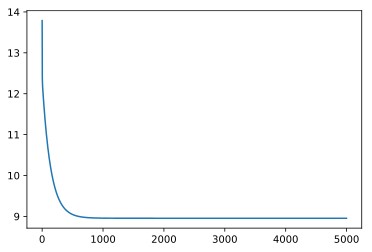

In [4]:
epochs = 5000
errors = []

m = np.random.random()
c = np.random.random()


for _ in range(epochs):
    dm = gradient_m(x, y, m, c)
    dc = gradient_c(x, y, m, c)

    step = 0.01

    # go down the hill
    m -= step * dm
    c -= step * dc
    
    errors.append(sq_error(x, y, m, c))

plt.plot(errors)

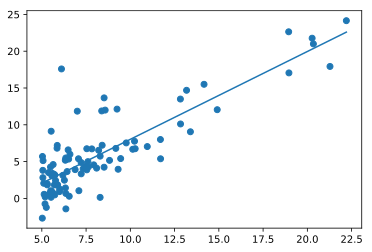

In [5]:
plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(x) * m + c, max(x) * m + c])

In [6]:
# Compare the result to scipy's inbuilt regression function

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print('scipy: %fx + %f' % (slope, intercept))
print('gradient descent: %fx + %f' % (m, c))

assert np.isclose(m, slope)
assert np.isclose(c, intercept)

scipy: 1.193034x + -3.895781
gradient descent: 1.193034x + -3.895781
